# Imports and data loading

In [4]:
import gtfparse
import os
import re
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000



import seaborn as sns
import glob
from tqdm import tqdm
from joblib import Parallel, delayed

from kmer_utils import get_encoded_kmer_hashvals

%load_ext autoreload
%autoreload 2

In [5]:
def format_integer(integer):
    return f'{integer:,d}'

def print_shape(df):
    height, width = df.shape
    df

In [6]:
outdir = '/Users/olgabot/botryllus/adhoc-analysis/2022-apr--gather-botryllus-in-human-mouse-with-kmers/'
# ! ls -lha $outdir

In [7]:
%%time

mhc_parquet_no_kmer = os.path.join(
    outdir,
    "botryllus_gather_mouse_human_results_with_e_values_mhc_chromosomes.parquet",
)


gather_results_mhc = pd.read_parquet(mhc_parquet_no_kmer).sort_values(
    "pseudo_e_value_log10", ascending=False
)
print([format_integer(x) for x in gather_results_mhc.shape])
gather_results_mhc.head()

['17,150,858', '25']
CPU times: user 37.9 s, sys: 46.6 s, total: 1min 24s
Wall time: 1min 20s


,i_query,kmer_query,kmer_hp,hashval,name_query,i_found,kmer_found,name_found,n_kmers,intersect_bp,containment,symbol,species,found_i,homolog_group,genomic_coord,all_homologs_found,transcript_id,n_hashes_query,n_hashes_found,bitscore,extreme_value_distribution,containment_scaled,pseudo_e_value,pseudo_e_value_log10
111,1809,TPQDLSFDDELSGSGFIKMTAIDE,phpphphppphphphhhphphhpp,9907776826781135193,g34325.t1 frame:1,6211,KYSDVELECEVTGTPPFEVTWLKN,"ENST00000589042.5 gene_id=ENSG00000155657.28;transcript_id=ENST00000589042.5;gene_type=protein_coding;gene_name=TTN;transcript_type=protein_coding;transcript_name=TTN-214;level=1;protein_id=ENSP00000467141.1;transcript_support_level=5;hgnc_id=HGNC:12403;tag=inferred_exon_combination,non_submitted_evidence,basic,Ensembl_canonical,MANE_Select,appris_principal_1,exp_conf,CCDS;ccdsid=CCDS59435.1;havana_gene=OTTHUMG00000154448.23;havana_transcript=OTTHUMT00000450680.3",17,85,0.000574,TTN,human,21,TTN---Ttn,Chr2:178525989-178807423(-),True,ENST00000589042.5,818,6963,2.0,0.631909,1.008588e-10,5.692463e+06,6.7553
107,1174,SSQILSNIHSTPAEPSEKITKPEF,ppphhpphppphhphppphpphph,17166888803531504833,g34325.t1 frame:1,33076,NETGLSRPRRTAMSIKTKLTSGEA,"ENST00000589042.5 gene_id=ENSG00000155657.28;transcript_id=ENST00000589042.5;gene_type=protein_coding;gene_name=TTN;transcript_type=protein_coding;transcript_name=TTN-214;level=1;protein_id=ENSP00000467141.1;transcript_support_level=5;hgnc_id=HGNC:12403;tag=inferred_exon_combination,non_submitted_evidence,basic,Ensembl_canonical,MANE_Select,appris_principal_1,exp_conf,CCDS;ccdsid=CCDS59435.1;havana_gene=OTTHUMG00000154448.23;havana_transcript=OTTHUMT00000450680.3",17,85,0.000574,TTN,human,21,TTN---Ttn,Chr2:178525989-178807423(-),True,ENST00000589042.5,818,6963,2.0,0.631909,1.008588e-10,5.692463e+06,6.7553
116,2943,NINASPGKSIPNGRNSTEMEIKTS,phphphhpphhphppppphphppp,16736377392760712828,g34325.t1 frame:1,34969,TAEVKWYHNGVELQESSKIHYTNT,"ENST00000589042.5 gene_id=ENSG00000155657.28;transcript_id=ENST00000589042.5;gene_type=protein_coding;gene_name=TTN;transcript_type=protein_coding;transcript_name=TTN-214;level=1;protein_id=ENSP00000467141.1;transcript_support_level=5;hgnc_id=HGNC:12403;tag=inferred_exon_combination,non_submitted_evidence,basic,Ensembl_canonical,MANE_Select,appris_principal_1,exp_conf,CCDS;ccdsid=CCDS59435.1;havana_gene=OTTHUMG00000154448.23;havana_transcript=OTTHUMT00000450680.3",17,85,0.000574,TTN,human,21,TTN---Ttn,Chr2:178525989-178807423(-),True,ENST00000589042.5,818,6963,2.0,0.631909,1.008588e-10,5.692463e+06,6.7553
115,2942,VNINASPGKSIPNGRNSTEMEIKT,hphphphhpphhphppppphphpp,9107980493672574754,g34325.t1 frame:1,34968,PTAEVKWYHNGVELQESSKIHYTN,"ENST00000589042.5 gene_id=ENSG00000155657.28;transcript_id=ENST00000589042.5;gene_type=protein_coding;gene_name=TTN;transcript_type=protein_coding;transcript_name=TTN-214;level=1;protein_id=ENSP00000467141.1;transcript_support_level=5;hgnc_id=HGNC:12403;tag=inferred_exon_combination,non_submitted_evidence,basic,Ensembl_canonical,MANE_Select,appris_principal_1,exp_conf,CCDS;ccdsid=CCDS59435.1;havana_gene=OTTHUMG00000154448.23;havana_transcript=OTTHUMT00000450680.3",17,85,0.000574,TTN,human,21,TTN---Ttn,Chr2:178525989-178807423(-),True,ENST00000589042.5,818,6963,2.0,0.631909,1.008588e-10,5.692463e+06,6.7553
114,2941,KVNINASPGKSIPNGRNSTEMEIK,phphphphhpphhphppppphphp,3164196682401607330,g34325.t1 frame:1,34967,KPTAEVKWYHNGVELQESSKIHYT,"ENST00000589042.5 gene_id=ENSG00000155657.28;transcript_id=ENST00000589042.5;gene_type=protein_coding;gene_name=TTN;transcript_type=protein_coding;transcript_name=TTN-214;level=1;protein_id=ENSP00000467141.1;transcript_support_level=5;hgnc_id=HGNC:12403;tag=inferred_exon_combination,non_submitted_evidence,basic,Ensembl_canonical,MANE_Select,appris_principal_1,exp_conf,CCDS;ccdsid=CCDS59435.1;havana_gene=OTTHUMG00000154448.23;havana_transcript=OTTHUMT00000450680.3",17,85,0.000574,TTN,human,21,TTN---Ttn,Chr2:178525989-178807423(-),True,ENST00000589042.5,818,6963,2.0,0.631909,1.00858

### What does BHF match to?

In [35]:
gather_results_mhc.query('name_query == "BHF"')

,name_query,name_found,n_kmers,intersect_bp,containment,symbol,species,homolog_group,genomic_coord,all_homologs_found,transcript_id,n_hashes_query,n_hashes_found,bitscore,extreme_value_distribution,containment_scaled,pseudo_e_value,pseudo_e_value_log10
16,BHF,"ENST00000339907.8 gene_id=ENSG00000188994.13;transcript_id=ENST00000339907.8;gene_type=protein_coding;gene_name=ZNF292;transcript_type=protein_coding;transcript_name=ZNF292-201;level=2;protein_id=ENSP00000342847.4;transcript_support_level=5;hgnc_id=HGNC:18410;tag=basic,appris_alternative_2;havana_gene=OTTHUMG00000015164.7;havana_transcript=OTTHUMT00000041428.2",6,30,0.003584,ZNF292,human,ZNF292---Zfp292,Chr6:87155551-87264172(+),False,ENST00000339907.8,40,558,2.0,0.630802,1.605838e-07,22240.143198,4.347138
10,BHF,"ENST00000369577.8 gene_id=ENSG00000188994.13;transcript_id=ENST00000369577.8;gene_type=protein_coding;gene_name=ZNF292;transcript_type=protein_coding;transcript_name=ZNF292-202;level=2;protein_id=ENSP00000358590.3;transcript_support_level=1;hgnc_id=HGNC:18410;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_2,CCDS;ccdsid=CCDS47457.1;havana_gene=OTTHUMG00000015164.7;havana_transcript=OTTHUMT00000376192.3",6,30,0.003591,ZNF292,human,ZNF292---Zfp292,Chr6:87155551-87264172(+),False,ENST00000369577.8,40,557,2.0,0.630800,1.611609e-07,22200.143455,4.346356
44,BHF,"ENST00000502264.5 gene_id=ENSG00000006283.18;transcript_id=ENST00000502264.5;gene_type=protein_coding;gene_name=CACNA1G;transcript_type=protein_coding;transcript_name=CACNA1G-209;level=2;protein_id=ENSP00000425522.1;transcript_support_level=1;hgnc_id=HGNC:1394;tag=basic,CCDS;ccdsid=CCDS45737.1;havana_gene=OTTHUMG00000162180.8;havana_transcript=OTTHUMT00000367935.2",2,10,0.004505,CACNA1G,human,CACNA1G---Cacna1g,Chr17:50560929-50629625(+),False,ENST00000502264.5,40,444,2.0,0.630463,2.536320e-07,17680.179910,4.247487
22,BHF,"ENST00000357060.8 gene_id=ENSG00000197748.13;transcript_id=ENST00000357060.8;gene_type=protein_coding;gene_name=CFAP43;transcript_type=protein_coding;transcript_name=CFAP43-202;level=2;protein_id=ENSP00000349568.3;transcript_support_level=1;hgnc_id=HGNC:26684;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_4,CCDS;ccdsid=CCDS31281.1;havana_gene=OTTHUMG00000019002.5;havana_transcript=OTTHUMT00000504335.2",3,15,0.006098,CFAP43,human,CFAP43---Cfap43,Chr10:104129888-104232363(-),False,ENST00000357060.8,40,328,2.0,0.629877,4.647531e-07,13040.243407,4.115286
25,BHF,"ENST00000308488.11 gene_id=ENSG00000048649.14;transcript_id=ENST00000308488.11;gene_type=protein_coding;gene_name=RSF1;transcript_type=protein_coding;transcript_name=RSF1-201;level=2;protein_id=ENSP00000311513.6;transcript_support_level=1;hgnc_id=HGNC:18118;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS8253.1;havana_gene=OTTHUMG00000150433.3;havana_transcript=OTTHUMT00000318075.2",5,25,0.007168,RSF1,human,RSF1---Rsf1,Chr11:77660009-77872232(-),False,ENST00000308488.11,40,279,2.0,0.629483,6.423350e-07,11080.286054,4.044551
30,BHF,ENST00000480887.5 gene_id=ENSG00000048649.14;transcript_id=ENST00000480887.5;gene_type=protein_coding;gene_name=RSF1;transcript_type=protein_coding;transcript_name=RSF1-204;level=2;protein_id=ENSP00000434509.1;transcript_support_level=1;hgnc_id=HGNC:18118;tag=basic;havana_gene=OTTHUMG00000150433.3;havana_transcript=OTTHUMT00000318077.2,5,25,0.008889,RSF1,human,RSF1---Rsf1,Chr11:77660009-77872232(-),False,ENST00000480887.5,40,225,2.0,0.628851,9.876543e-07,8920.354504,3.950382
116,BHF,"ENST00000678073.1 gene_id=ENSG00000130234.13;transcript_id=ENST00000678073.1;gene_type=protein_coding;gene_name=ACE2;transcript_type=protein_coding;transcript_name=ACE2-207;level=2;protein_id=ENSP00000504103.1;hgnc_id=HGNC:13557;tag=alternative_5_UTR,inferred_transcript_model,RNA_Seq_supported_only,basic,appris_principal_2,CCDS;ccdsid=CCDS14169.1;havana_gene=OTTHUMG00000193402.2",6,30,0.013158,ACE2,human,ACE2---Ace2,ChrX:15494525-15602069(-),False,ENST00000678073.1,40,152,2.0,0.627280,2

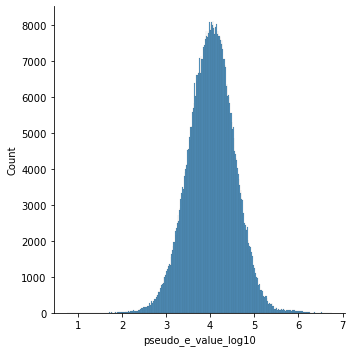

In [36]:
sns.displot(gather_results_mhc['pseudo_e_value_log10'])

In [7]:
bhf_matches = gather_results_mhc.query('name_query == "BHF"')
print(bhf_matches.shape)
bhf_matches.head()

(151, 25)


,i_query,kmer_query,kmer_hp,hashval,name_query,i_found,kmer_found,name_found,n_kmers,intersect_bp,containment,symbol,species,found_i,homolog_group,genomic_coord,all_homologs_found,transcript_id,n_hashes_query,n_hashes_found,bitscore,extreme_value_distribution,containment_scaled,pseudo_e_value,pseudo_e_value_log10
0,165,DDRFGERLIDRAQNKYAPLDEKQR,ppphhpphhpphppphhhhppppp,13592530723998561865,BHF,154,KSEFLSTAPRSLRKRLIVPRSHSD,"ENST00000234296.7 gene_id=ENSG00000115942.9;transcript_id=ENST00000234296.7;gene_type=protein_coding;gene_name=ORC2;transcript_type=protein_coding;transcript_name=ORC2-201;level=2;protein_id=ENSP00000234296.2;transcript_support_level=1;hgnc_id=HGNC:8488;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS2334.1;havana_gene=OTTHUMG00000132783.25;havana_transcript=OTTHUMT00000256191.3",6,30,0.015873,ORC2,human,0,ORC2---Orc2,Chr2:200908981-200963703(-),False,ENST00000234296.7,40,126,2.0,0.626281,0.000003,4960.631575,3.695537
1,166,DRFGERLIDRAQNKYAPLDEKQRS,pphhpphhpphppphhhhpppppp,18007806196568601670,BHF,155,SEFLSTAPRSLRKRLIVPRSHSDS,"ENST00000234296.7 gene_id=ENSG00000115942.9;transcript_id=ENST00000234296.7;gene_type=protein_coding;gene_name=ORC2;transcript_type=protein_coding;transcript_name=ORC2-201;level=2;protein_id=ENSP00000234296.2;transcript_support_level=1;hgnc_id=HGNC:8488;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS2334.1;havana_gene=OTTHUMG00000132783.25;havana_transcript=OTTHUMT00000256191.3",6,30,0.015873,ORC2,human,0,ORC2---Orc2,Chr2:200908981-200963703(-),False,ENST00000234296.7,40,126,2.0,0.626281,0.000003,4960.631575,3.695537
2,167,RFGERLIDRAQNKYAPLDEKQRSE,phhpphhpphppphhhhppppppp,4680963950811137194,BHF,156,EFLSTAPRSLRKRLIVPRSHSDSE,"ENST00000234296.7 gene_id=ENSG00000115942.9;transcript_id=ENST00000234296.7;gene_type=protein_coding;gene_name=ORC2;transcript_type=protein_coding;transcript_name=ORC2-201;level=2;protein_id=ENSP00000234296.2;transcript_support_level=1;hgnc_id=HGNC:8488;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS2334.1;havana_gene=OTTHUMG00000132783.25;havana_transcript=OTTHUMT00000256191.3",6,30,0.015873,ORC2,human,0,ORC2---Orc2,Chr2:200908981-200963703(-),False,ENST00000234296.7,40,126,2.0,0.626281,0.000003,4960.631575,3.695537
3,168,FGERLIDRAQNKYAPLDEKQRSES,hhpphhpphppphhhhpppppppp,343616811934702161,BHF,157,FLSTAPRSLRKRLIVPRSHSDSES,"ENST00000234296.7 gene_id=ENSG00000115942.9;transcript_id=ENST00000234296.7;gene_type=protein_coding;gene_name=ORC2;transcript_type=protein_coding;transcript_name=ORC2-201;level=2;protein_id=ENSP00000234296.2;transcript_support_level=1;hgnc_id=HGNC:8488;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS2334.1;havana_gene=OTTHUMG00000132783.25;havana_transcript=OTTHUMT00000256191.3",6,30,0.015873,ORC2,human,0,ORC2---Orc2,Chr2:200908981-200963703(-),False,ENST00000234296.7,40,126,2.0,0.626281,0.000003,4960.631575,3.695537
4,169,GERLIDRAQNKYAPLDEKQRSESH,hpphhpphppphhhhppppppppp,3434887395817678525,BHF,158,LSTAPRSLRKRLIVPRSHSDSESE,"ENST00000234296.7 gene_id=ENSG00000115942.9;transcript_id=ENST00000234296.7;gene_type=protein_coding;gene_name=ORC2;transcript_type=protein_coding;transcript_name=ORC2-201;level=2;protein_id=ENSP00000234296.2;transcript_support_level=1;hgnc_id=HGNC:8488;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS2334.1;havana_gene=OTTHUMG00000132783.25;havana_transcript=OTTHUMT00000256191.3",6,30,0.015873,ORC2,human,0,ORC2---Orc2,Chr2:200908981-200963703(-),False,ENST00000234296.7,40,126,2.0,0.626281,0.000003,4960.631575,3.695537


In [42]:
bhf_matches_top_hit = bhf_matches.loc[bhf_matches['pseudo_e_value_log10'] > 4]
bhf_matches_top_hit

,i_query,kmer_query,kmer_hp,hashval,name_query,i_found,kmer_found,name_found,n_kmers,intersect_bp,containment,symbol,species,found_i,homolog_group,genomic_coord,all_homologs_found,transcript_id,n_hashes_query,n_hashes_found,bitscore,extreme_value_distribution,containment_scaled,pseudo_e_value,pseudo_e_value_log10
10,37,IFCRILTALHLKKRRTEHDHQKLL,hhpphhphhphppppppppppphh,10240013254256923235,BHF,604,PLRRLGRPPKITTTNENQKTNTVA,"ENST00000369577.8 gene_id=ENSG00000188994.13;transcript_id=ENST00000369577.8;gene_type=protein_coding;gene_name=ZNF292;transcript_type=protein_coding;transcript_name=ZNF292-202;level=2;protein_id=ENSP00000358590.3;transcript_support_level=1;hgnc_id=HGNC:18410;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_2,CCDS;ccdsid=CCDS47457.1;havana_gene=OTTHUMG00000015164.7;havana_transcript=OTTHUMT00000376192.3",6,30,0.003591,ZNF292,human,2,ZNF292---Zfp292,Chr6:87155551-87264172(+),False,ENST00000369577.8,40,557,2.0,0.630800,1.611609e-07,22200.143455,4.346356
11,38,FCRILTALHLKKRRTEHDHQKLLS,hpphhphhphppppppppppphhp,8047764348242702868,BHF,605,LRRLGRPPKITTTNENQKTNTVAK,"ENST00000369577.8 gene_id=ENSG00000188994.13;transcript_id=ENST00000369577.8;gene_type=protein_coding;gene_name=ZNF292;transcript_type=protein_coding;transcript_name=ZNF292-202;level=2;protein_id=ENSP00000358590.3;transcript_support_level=1;hgnc_id=HGNC:18410;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_2,CCDS;ccdsid=CCDS47457.1;havana_gene=OTTHUMG00000015164.7;havana_transcript=OTTHUMT00000376192.3",6,30,0.003591,ZNF292,human,2,ZNF292---Zfp292,Chr6:87155551-87264172(+),False,ENST00000369577.8,40,557,2.0,0.630800,1.611609e-07,22200.143455,4.346356
12,39,CRILTALHLKKRRTEHDHQKLLSE,pphhphhphppppppppppphhpp,1452226584929511062,BHF,606,RRLGRPPKITTTNENQKTNTVAKQ,"ENST00000369577.8 gene_id=ENSG00000188994.13;transcript_id=ENST00000369577.8;gene_type=protein_coding;gene_name=ZNF292;transcript_type=protein_coding;transcript_name=ZNF292-202;level=2;protein_id=ENSP00000358590.3;transcript_support_level=1;hgnc_id=HGNC:18410;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_2,CCDS;ccdsid=CCDS47457.1;havana_gene=OTTHUMG00000015164.7;havana_transcript=OTTHUMT00000376192.3",6,30,0.003591,ZNF292,human,2,ZNF292---Zfp292,Chr6:87155551-87264172(+),False,ENST00000369577.8,40,557,2.0,0.630800,1.611609e-07,22200.143455,4.346356
13,40,RILTALHLKKRRTEHDHQKLLSES,phhphhphppppppppppphhppp,16483354457599739342,BHF,607,RLGRPPKITTTNENQKTNTVAKQE,"ENST00000369577.8 gene_id=ENSG00000188994.13;transcript_id=ENST00000369577.8;gene_type=protein_coding;gene_name=ZNF292;transcript_type=protein_coding;transcript_name=ZNF292-202;level=2;protein_id=ENSP00000358590.3;transcript_support_level=1;hgnc_id=HGNC:18410;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_2,CCDS;ccdsid=CCDS47457.1;havana_gene=OTTHUMG00000015164.7;havana_transcript=OTTHUMT00000376192.3",6,30,0.003591,ZNF292,human,2,ZNF292---Zfp292,Chr6:87155551-87264172(+),False,ENST00000369577.8,40,557,2.0,0.630800,1.611609e-07,22200.143455,4.346356
14,41,ILTALHLKKRRTEHDHQKLLSESQ,hhphhphppppppppppphhpppp,14855361501953140786,BHF,608,LGRPPKITTTNENQKTNTVAKQEQ,"ENST00000369577.8 gene_id=ENSG00000188994.13;transcript_id=ENST00000369577.8;gene_type=protein_coding;gene_name=ZNF292;transcript_type=protein_coding;transcript_name=ZNF292-202;level=2;protein_id=ENSP00000358590.3;transcript_support_level=1;hgnc_id=HGNC:18410;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_2,CCDS;ccdsid=CCDS47457.1;havana_gene=OTTHUMG00000015164.7;havana_transcript=OTTHUMT00000376192.3",6,30,0.003591,ZNF292,human,2,ZNF292---Zfp292,Chr6:87155551-87264172(+),False,ENST00000369577.8,40,557,2.0,0.630800,1.611609e-07,22200.143455,4.346356
15,42,LTALHLKKRRTEHDHQKLLSESQE,hphhphppppppppppphhppppp,791636867468234754,BHF,609,GRPPKITTTNENQKTNTVAKQEQR,"ENST00000369577.8 gene_id=ENSG00000188994.13;transcript_id=ENST00000369577.8;gene_type=protein_coding;gene_name=ZNF292;transcript_type=protein_coding;transcript_name=ZNF292-202;level=2;protein_

In [45]:
', '.join(bhf_matches_top_hit.symbol.unique())

'ZNF292, CFAP43, RSF1, CACNA1G'

In [46]:
outdir

'/Users/olgabot/botryllus/adhoc-analysis/2022-apr--gather-botryllus-in-human-mouse-with-kmers/'

In [43]:
bhf_matches_top_hit.to_csv(f"{outdir}/bhf_top_hits_by_evalue.csv", index=False)

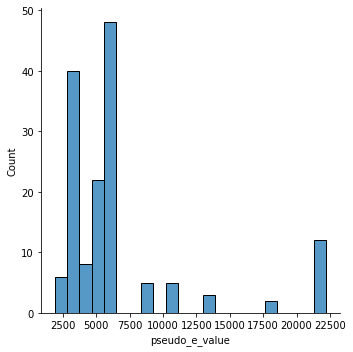

In [9]:
sns.displot(bhf_matches['pseudo_e_value'])

# Subset to only HLA genes

In [10]:
human_hla = gather_results_mhc.symbol.str.startswith("HLA")
# mouse_hla = gather_results_mhc.symbol.str.startswith("H2-")
putative_hla = gather_results_mhc.loc[human_hla]
print(putative_hla.shape)
putative_hla.head()

(1249, 25)


,i_query,kmer_query,kmer_hp,hashval,name_query,i_found,kmer_found,name_found,n_kmers,intersect_bp,containment,symbol,species,found_i,homolog_group,genomic_coord,all_homologs_found,transcript_id,n_hashes_query,n_hashes_found,bitscore,extreme_value_distribution,containment_scaled,pseudo_e_value,pseudo_e_value_log10
0,101,LNASVEILSYFALWGFLRLAGMRI,hphphphhphhhhhhhhphhhhph,14727812379951326220,g24803.t1 frame:2,216,LKVSVSAVTLGLGLIIFSLGVISW,"ENST00000418107.3 gene_id=ENSG00000242574.9;transcript_id=ENST00000418107.3;gene_type=protein_coding;gene_name=HLA-DMB;transcript_type=protein_coding;transcript_name=HLA-DMB-258;level=2;protein_id=ENSP00000398890.2;transcript_support_level=NA;hgnc_id=HGNC:4935;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS4760.1;havana_gene=OTTHUMG00000031176.4;havana_transcript=OTTHUMT00000076340.3",6,30,0.047619,HLA,human,0,None,None,None,ENST00000418107.3,30,42,2.0,0.614609,0.000038,1201.406163,3.07969
1,102,NASVEILSYFALWGFLRLAGMRIT,phphphhphhhhhhhhphhhhphp,12122782715747205387,g24803.t1 frame:2,217,KVSVSAVTLGLGLIIFSLGVISWR,"ENST00000418107.3 gene_id=ENSG00000242574.9;transcript_id=ENST00000418107.3;gene_type=protein_coding;gene_name=HLA-DMB;transcript_type=protein_coding;transcript_name=HLA-DMB-258;level=2;protein_id=ENSP00000398890.2;transcript_support_level=NA;hgnc_id=HGNC:4935;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS4760.1;havana_gene=OTTHUMG00000031176.4;havana_transcript=OTTHUMT00000076340.3",6,30,0.047619,HLA,human,0,None,None,None,ENST00000418107.3,30,42,2.0,0.614609,0.000038,1201.406163,3.07969
2,103,ASVEILSYFALWGFLRLAGMRITC,hphphhphhhhhhhhphhhhphpp,731582254459325854,g24803.t1 frame:2,218,VSVSAVTLGLGLIIFSLGVISWRR,"ENST00000418107.3 gene_id=ENSG00000242574.9;transcript_id=ENST00000418107.3;gene_type=protein_coding;gene_name=HLA-DMB;transcript_type=protein_coding;transcript_name=HLA-DMB-258;level=2;protein_id=ENSP00000398890.2;transcript_support_level=NA;hgnc_id=HGNC:4935;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS4760.1;havana_gene=OTTHUMG00000031176.4;havana_transcript=OTTHUMT00000076340.3",6,30,0.047619,HLA,human,0,None,None,None,ENST00000418107.3,30,42,2.0,0.614609,0.000038,1201.406163,3.07969
3,104,SVEILSYFALWGFLRLAGMRITCF,phphhphhhhhhhhphhhhphpph,9470123982851188374,g24803.t1 frame:2,219,SVSAVTLGLGLIIFSLGVISWRRA,"ENST00000418107.3 gene_id=ENSG00000242574.9;transcript_id=ENST00000418107.3;gene_type=protein_coding;gene_name=HLA-DMB;transcript_type=protein_coding;transcript_name=HLA-DMB-258;level=2;protein_id=ENSP00000398890.2;transcript_support_level=NA;hgnc_id=HGNC:4935;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS4760.1;havana_gene=OTTHUMG00000031176.4;havana_transcript=OTTHUMT00000076340.3",6,30,0.047619,HLA,human,0,None,None,None,ENST00000418107.3,30,42,2.0,0.614609,0.000038,1201.406163,3.07969
4,105,VEILSYFALWGFLRLAGMRITCFL,hphhphhhhhhhhphhhhphpphh,1731407111791498839,g24803.t1 frame:2,220,VSAVTLGLGLIIFSLGVISWRRAG,"ENST00000418107.3 gene_id=ENSG00000242574.9;transcript_id=ENST00000418107.3;gene_type=protein_coding;gene_name=HLA-DMB;transcript_type=protein_coding;transcript_name=HLA-DMB-258;level=2;protein_id=ENSP00000398890.2;transcript_support_level=NA;hgnc_id=HGNC:4935;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS4760.1;havana_gene=OTTHUMG00000031176.4;havana_transcript=OTTHUMT00000076340.3",6,30,0.047619,HLA,human,0,None,None,None,ENST00000418107.3,30,42,2.0,0.614609,0.000038,1201.406163,3.07969


In [15]:
putative_hla.pseudo_e_value_log10.describe()

count    1249.000000
mean        3.478156
std         0.350527
min         2.490148
25%         3.201353
50%         3.526238
75%         3.714738
max         4.292584
Name: pseudo_e_value_log10, dtype: float64

In [21]:
putative_hla_top_e_values = putative_hla.query("pseudo_e_value_log10 > 4")
putative_hla_top_e_values = putative_hla_top_e_values.sort_values(
    "pseudo_e_value_log10", ascending=False
)
print(putative_hla_top_e_values.shape)
putative_hla_top_e_values.head()

(79, 25)


,i_query,kmer_query,kmer_hp,hashval,name_query,i_found,kmer_found,name_found,n_kmers,intersect_bp,containment,symbol,species,found_i,homolog_group,genomic_coord,all_homologs_found,transcript_id,n_hashes_query,n_hashes_found,bitscore,extreme_value_distribution,containment_scaled,pseudo_e_value,pseudo_e_value_log10
80,836,EMESKIERTWVVNLIAGSLRDEGD,phppphppphhhphhhhphppphp,2088024015223878083,g858.t1 frame:1,276,RYTCHVQHEGLPQPLILRWEQSPQ,"ENST00000259951.12 gene_id=ENSG00000204642.14;transcript_id=ENST00000259951.12;gene_type=protein_coding;gene_name=HLA-F;transcript_type=protein_coding;transcript_name=HLA-F-216;level=2;protein_id=ENSP00000259951.6;transcript_support_level=NA;hgnc_id=HGNC:4963;tag=basic,Ensembl_canonical,MANE_Select,appris_alternative_2,CCDS;ccdsid=CCDS43437.1;havana_gene=OTTHUMG00000031156.6;havana_transcript=OTTHUMT00000195085.3",3,15,0.035714,HLA,human,12,None,None,None,ENST00000259951.12,242,84,2.0,0.618985,0.000002,19614.811317,4.292584
81,837,MESKIERTWVVNLIAGSLRDEGDY,hppphppphhhphhhhphppphph,393105819462812905,g858.t1 frame:1,277,YTCHVQHEGLPQPLILRWEQSPQP,"ENST00000259951.12 gene_id=ENSG00000204642.14;transcript_id=ENST00000259951.12;gene_type=protein_coding;gene_name=HLA-F;transcript_type=protein_coding;transcript_name=HLA-F-216;level=2;protein_id=ENSP00000259951.6;transcript_support_level=NA;hgnc_id=HGNC:4963;tag=basic,Ensembl_canonical,MANE_Select,appris_alternative_2,CCDS;ccdsid=CCDS43437.1;havana_gene=OTTHUMG00000031156.6;havana_transcript=OTTHUMT00000195085.3",3,15,0.035714,HLA,human,12,None,None,None,ENST00000259951.12,242,84,2.0,0.618985,0.000002,19614.811317,4.292584
82,838,ESKIERTWVVNLIAGSLRDEGDYK,ppphppphhhphhhhphppphphp,1179802928487376471,g858.t1 frame:1,278,TCHVQHEGLPQPLILRWEQSPQPT,"ENST00000259951.12 gene_id=ENSG00000204642.14;transcript_id=ENST00000259951.12;gene_type=protein_coding;gene_name=HLA-F;transcript_type=protein_coding;transcript_name=HLA-F-216;level=2;protein_id=ENSP00000259951.6;transcript_support_level=NA;hgnc_id=HGNC:4963;tag=basic,Ensembl_canonical,MANE_Select,appris_alternative_2,CCDS;ccdsid=CCDS43437.1;havana_gene=OTTHUMG00000031156.6;havana_transcript=OTTHUMT00000195085.3",3,15,0.035714,HLA,human,12,None,None,None,ENST00000259951.12,242,84,2.0,0.618985,0.000002,19614.811317,4.292584
3048,249,GMGIPPPLPPGMLGRLPFPPPMGM,hhhhhhhhhhhhhhphhhhhhhhh,22467056546830141,g8697.t1 frame:2,305,VGIVAGLVVLGAVVTGAVVAAVMW,"ENST00000259951.12 gene_id=ENSG00000204642.14;transcript_id=ENST00000259951.12;gene_type=protein_coding;gene_name=HLA-F;transcript_type=protein_coding;transcript_name=HLA-F-216;level=2;protein_id=ENSP00000259951.6;transcript_support_level=NA;hgnc_id=HGNC:4963;tag=basic,Ensembl_canonical,MANE_Select,appris_alternative_2,CCDS;ccdsid=CCDS43437.1;havana_gene=OTTHUMG00000031156.6;havana_transcript=OTTHUMT00000195085.3",3,15,0.023810,HLA,human,323,None,None,None,ENST00000259951.12,237,84,2.0,0.623362,0.000001,19439.598338,4.288687
3047,248,MGMGIPPPLPPGMLGRLPFPPPMG,hhhhhhhhhhhhhhhphhhhhhhh,2936618633206970386,g8697.t1 frame:2,304,IVGIVAGLVVLGAVVTGAVVAAVM,"ENST00000259951.12 gene_id=ENSG00000204642.14;transcript_id=ENST00000259951.12;gene_type=protein_coding;gene_name=HLA-F;transcript_type=protein_coding;transcript_name=HLA-F-216;level=2;protein_id=ENSP00000259951.6;transcript_support_level=NA;hgnc_id=HGNC:4963;tag=basic,Ensembl_canonical,MANE_Select,appris_alternative_2,CCDS;ccdsid=CCDS43437.1;havana_gene=OTTHUMG00000031156.6;havana_transcript=OTTHUMT00000195085.3",3,15,0.023810,HLA,human,323,None,None,None,ENST00000259951.12,237,84,2.0,0.623362,0.000001,19439.598338,4.288687


In [18]:
putative_hla_top_e_values.name_query.nunique()

7

In [19]:
putative_hla_top_e_values.name_query.unique()

array(['g16489.t1 frame:1', 'g2716.t1 frame:1', 'g10570.t1 frame:1',
       'g858.t1 frame:1', 'g8697.t1 frame:2', 'g15686.t1 frame:1',
       'g9918.t1 frame:3'], dtype=object)

In [40]:
putative_hla_top_e_values.groupby('name_query').n_kmers.mean().sort_values()

name_query
g2716.t1 frame:1      2.0
g9918.t1 frame:3      2.0
g10570.t1 frame:1     3.0
g16489.t1 frame:1     3.0
g858.t1 frame:1       3.0
g8697.t1 frame:2      3.0
g15686.t1 frame:1    19.0
Name: n_kmers, dtype: float64

In [41]:
putative_hla_top_e_values.query('name_query == "g15686.t1 frame:1"')

,i_query,kmer_query,kmer_hp,hashval,name_query,i_found,kmer_found,name_found,n_kmers,intersect_bp,containment,symbol,species,found_i,homolog_group,genomic_coord,all_homologs_found,transcript_id,n_hashes_query,n_hashes_found,bitscore,extreme_value_distribution,containment_scaled,pseudo_e_value,pseudo_e_value_log10
206,23,YPGIIAGGIAGLIVGLIVGFILYV,hhhhhhhhhhhhhhhhhhhhhhhh,9861632321643286196,g15686.t1 frame:1,307,IVGIVAGLAVLAVVVIGAVVAAVM,"ENST00000412585.7 gene_id=ENSG00000234745.13;transcript_id=ENST00000412585.7;gene_type=protein_coding;gene_name=HLA-B;transcript_type=protein_coding;transcript_name=HLA-B-249;level=2;protein_id=ENSP00000399168.2;transcript_support_level=NA;hgnc_id=HGNC:4932;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS34394.1;havana_gene=OTTHUMG00000031153.7;havana_transcript=OTTHUMT00000076280.5",19,95,0.046875,HLA,human,28,None,None,None,ENST00000412585.7,167,64,2.0,0.614882,0.000004,10198.560846,4.008539
207,24,PGIIAGGIAGLIVGLIVGFILYVL,hhhhhhhhhhhhhhhhhhhhhhhh,9861632321643286196,g15686.t1 frame:1,305,VPIVGIVAGLAVLAVVVIGAVVAA,"ENST00000412585.7 gene_id=ENSG00000234745.13;transcript_id=ENST00000412585.7;gene_type=protein_coding;gene_name=HLA-B;transcript_type=protein_coding;transcript_name=HLA-B-249;level=2;protein_id=ENSP00000399168.2;transcript_support_level=NA;hgnc_id=HGNC:4932;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS34394.1;havana_gene=OTTHUMG00000031153.7;havana_transcript=OTTHUMT00000076280.5",19,95,0.046875,HLA,human,28,None,None,None,ENST00000412585.7,167,64,2.0,0.614882,0.000004,10198.560846,4.008539
215,30,GIAGLIVGLIVGFILYVLCCSRKR,hhhhhhhhhhhhhhhhhhpppppp,9681548483015917977,g15686.t1 frame:1,313,GLAVLAVVVIGAVVAAVMCRRKSS,"ENST00000412585.7 gene_id=ENSG00000234745.13;transcript_id=ENST00000412585.7;gene_type=protein_coding;gene_name=HLA-B;transcript_type=protein_coding;transcript_name=HLA-B-249;level=2;protein_id=ENSP00000399168.2;transcript_support_level=NA;hgnc_id=HGNC:4932;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS34394.1;havana_gene=OTTHUMG00000031153.7;havana_transcript=OTTHUMT00000076280.5",19,95,0.046875,HLA,human,28,None,None,None,ENST00000412585.7,167,64,2.0,0.614882,0.000004,10198.560846,4.008539
214,29,GGIAGLIVGLIVGFILYVLCCSRK,hhhhhhhhhhhhhhhhhhhppppp,12259258059889628415,g15686.t1 frame:1,312,AGLAVLAVVVIGAVVAAVMCRRKS,"ENST00000412585.7 gene_id=ENSG00000234745.13;transcript_id=ENST00000412585.7;gene_type=protein_coding;gene_name=HLA-B;transcript_type=protein_coding;transcript_name=HLA-B-249;level=2;protein_id=ENSP00000399168.2;transcript_support_level=NA;hgnc_id=HGNC:4932;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS34394.1;havana_gene=OTTHUMG00000031153.7;havana_transcript=OTTHUMT00000076280.5",19,95,0.046875,HLA,human,28,None,None,None,ENST00000412585.7,167,64,2.0,0.614882,0.000004,10198.560846,4.008539
213,28,AGGIAGLIVGLIVGFILYVLCCSR,hhhhhhhhhhhhhhhhhhhhpppp,17806666836309580259,g15686.t1 frame:1,311,VAGLAVLAVVVIGAVVAAVMCRRK,"ENST00000412585.7 gene_id=ENSG00000234745.13;transcript_id=ENST00000412585.7;gene_type=protein_coding;gene_name=HLA-B;transcript_type=protein_coding;transcript_name=HLA-B-249;level=2;protein_id=ENSP00000399168.2;transcript_support_level=NA;hgnc_id=HGNC:4932;tag=basic,Ensembl_canonical,MANE_Select,appris_principal_1,CCDS;ccdsid=CCDS34394.1;havana_gene=OTTHUMG00000031153.7;havana_transcript=OTTHUMT00000076280.5",19,95,0.046875,HLA,human,28,None,None,None,ENST00000412585.7,167,64,2.0,0.614882,0.000004,10198.560846,4.008539
212,27,IAGGIAGLIVGLIVGFILYVLCCS,hhhhhhhhhhhhhhhhhhhhhppp,4971027983613616759,g15686.t1 frame:1,310,IVAGLAVLAVVVIGAVVAAVMCRR,"ENST00000412585.7 gene_id=ENSG00000234745.13;transcript_id=ENST00000412585.7;gene_type=protein_coding;gene_name=HLA-B;transcript_type=protein_coding;transcript_name=HLA-B-249;level=2;protein_id=ENSP00000399168.2;transcript_support_level=NA;hgnc_id=HGNC:4932;tag=basic,Ensembl_canonical,MANE_Select,appri

In [27]:
putative_hla_top_e_values.groupby(
    "name_query"
).pseudo_e_value_log10.mean().sort_values(ascending=False)

name_query
g858.t1 frame:1      4.191029
g8697.t1 frame:2     4.163631
g10570.t1 frame:1    4.146717
g2716.t1 frame:1     4.058345
g16489.t1 frame:1    4.050660
g9918.t1 frame:3     4.021149
g15686.t1 frame:1    4.008539
Name: pseudo_e_value_log10, dtype: float64

In [13]:
putative_hla.species.value_counts()

human    1249
Name: species, dtype: int64

In [ ]:
putative_hla

In [15]:
putative_hla.name_query.value_counts()

g9483.t1 frame:1     77
g8075.t1 frame:1     72
g5573.t1 frame:1     62
g8467.t1 frame:1     48
g31619.t1 frame:2    48
                     ..
g6207.t1 frame:1      3
g20497.t1 frame:3     3
g9918.t1 frame:3      2
g23249.t1 frame:1     2
g11820.t1 frame:1     2
Name: name_query, Length: 73, dtype: int64